# MALARIA CELL DETECTION USING CNN AND TRANSFER LEARNING

 This notebook implemet malarial cell detection using CNN ,The model trained had the following accuracy values
<br>
**Test = 97%**
<br>
**Train = 96.5%**
<br>
**validation = 91%**
<br>
malarial cell dataset from kaggle was used to train and test the models


## Loading Data Using ImageGenerator

In [18]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = r'C:\Users\loges\Downloads\malarial_dataset\cell_images\cell_images'

data_gen_train = ImageDataGenerator(
    rescale=1./255,validation_split=0.2 )
    
'''rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,'''
    


data_gen_validation =ImageDataGenerator(rescale=1./255)

train_gen = data_gen_train.flow_from_directory(
    path,
    target_size=(150,150),
    batch_size=64,
    class_mode='binary',
    subset='training' 
)

validation_gen = data_gen_train.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)




Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [108]:
data_gen_test =ImageDataGenerator(rescale=1./255)
test_gen = data_gen_train.flow_from_directory(
    r'C:\Users\loges\Downloads\archive (3)\Dataset\Test',
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)


Found 134 images belonging to 2 classes.


## CNN MODEL

In [123]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.applications.vgg19 import VGG19


base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False


In [21]:
model = Sequential()
model.add(base_model)
model.add(layers.Conv2D(256, (3, 3), activation='relu',kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(layers. Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 256)         1179904   
                                                                 
 batch_normalization_3 (Batc  (None, 2, 2, 256)        1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [22]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // 64,
    epochs=10,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // 64
)

Epoch 1/10
344/344 [==============================] - 253s 729ms/step - loss: 0.2329 - accuracy: 0.9024 - val_loss: 0.2834 - val_accuracy: 0.9010
Epoch 2/10
344/344 [==============================] - 213s 620ms/step - loss: 0.1651 - accuracy: 0.9348 - val_loss: 0.2840 - val_accuracy: 0.8854
Epoch 3/10
344/344 [==============================] - 213s 619ms/step - loss: 0.1451 - accuracy: 0.9441 - val_loss: 0.3074 - val_accuracy: 0.8932
Epoch 4/10
344/344 [==============================] - 214s 621ms/step - loss: 0.1322 - accuracy: 0.9500 - val_loss: 0.4553 - val_accuracy: 0.8652
Epoch 5/10
344/344 [==============================] - 214s 623ms/step - loss: 0.1220 - accuracy: 0.9556 - val_loss: 0.2131 - val_accuracy: 0.9219
Epoch 6/10
344/344 [==============================] - 238s 692ms/step - loss: 0.1055 - accuracy: 0.9612 - val_loss: 0.2637 - val_accuracy: 0.9141
Epoch 7/10
344/344 [==============================] - 214s 621ms/step - loss: 0.0961 - accuracy: 0.9637 - val_loss: 0.2829 -

In [23]:
model.save('malaria_classification.h5')


## Evaluating model on test dataset

In [110]:
test_eval = model.evaluate(test_gen)

3/3 [==============================] - 1s 275ms/step - loss: 0.0915 - accuracy: 0.9701


## Comparison of test , train, validation accuracy

[0.90238356590271, 0.9347707629203796, 0.9440502524375916, 0.9500091075897217, 0.9556495547294617, 0.9611990451812744, 0.9637463688850403, 0.9694323539733887, 0.9716612100601196, 0.9745724201202393]


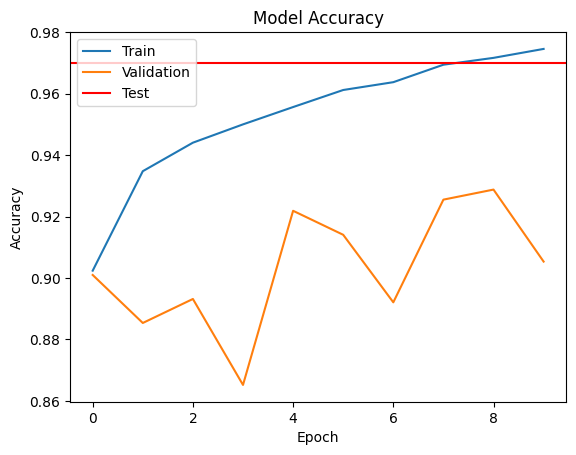

In [124]:
import matplotlib.pyplot as plt

print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axhline(y=test_eval[1], color='r', linestyle='-', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation','Test'], loc='upper left')
plt.show()

## Function to predict class of the given cell image

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
def predict_cell(path):
    image_path = path
    img = image.load_img(image_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0
    predictions = model.predict(img_array)
    lable = "PARASITED CELL" if predictions<0.5  else "NON-INFECTED CELL"
    print((predictions))
    print(lable)
   

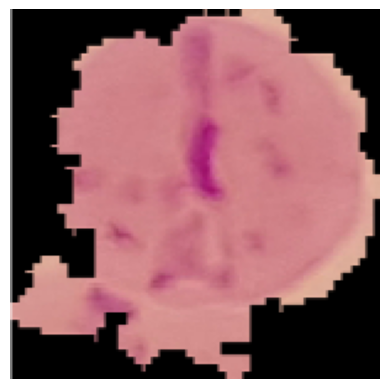

1/1 [==============================] - 0s 32ms/step
[[1.7821546e-09]]
PARASITED CELL


In [129]:
predict_cell(r'img1.png')

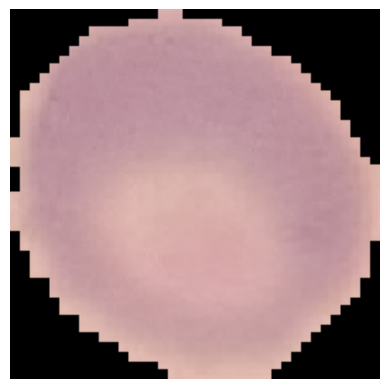

1/1 [==============================] - 0s 33ms/step
[[0.99680495]]
NON-INFECTED CELL


In [132]:
predict_cell(r'img2.jpg')

## Finding Optimized Model Architecture Using Keras_tuner

In [3]:
def build_model(hp):
    model = Sequential()

    #hyper parameters
    units = hp.Int('units', min_value=32, max_value=512, step=32)
    activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)

    
    model.add(base_model)
    model.add(layers.Conv2D(units, (3, 3), activation='relu',kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())

    model.add(layers.Dense(units, activation='relu',kernel_initializer='he_uniform'))
    model.add(layers.Dense(units, activation='relu',kernel_initializer='he_uniform'))
    model.add(layers. Dense(units, activation='relu',kernel_initializer='he_uniform'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [4]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  
    directory='tuner_malarial_cell',  
    project_name='malaria_detection'
)


In [ ]:
tuner.search(train_gen, validation_data=validation_gen, epochs=10)
